# Face Mask Detection

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import os
import pickle
import random

# Data Set Creation

In [3]:
Directory = "MaskDataSet/train"
Classes = ["with_mask","without_mask"]
Train_Data = []
for Cata in Classes:
    path = os.path.join(Directory , Cata)
    for image in os.listdir(path):
        image_array = cv2.imread(os.path.join(path,image))
        image_array = cv2.resize(image_array , (224,224))
        Train_Data.append([image_array,Classes.index(Cata)])

In [4]:
random.shuffle(Train_Data)

In [5]:
X,Y=[],[]

for x,y in Train_Data:
    X.append(x)
    Y.append(y)

X = np.array(X).reshape(-1,224,224,3)
Y = np.array(Y)

In [6]:
X = X/255.0

# Saving DataSet

In [7]:
p_o = open("X.pickle","wb")
pickle.dump(X , p_o)
p_o.close()

p_o = open("Y.pickle","wb")
pickle.dump(Y , p_o)
p_o.close()

In [4]:
p_i = open("X.pickle" , "rb")
X = pickle.load(p_i)

p_i = open("Y.pickle" , "rb")
Y = pickle.load(p_i)

# Transfer Learning

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.applications.mobilenet.MobileNet()

base_input = model.layers[0].input
base_output = model.layers[-4].output

flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

new_model = keras.Model(inputs = base_input , outputs= final_output)

In [9]:
new_model.compile(loss="binary_crossentropy" , optimizer="adam" , metrics=["accuracy"])
new_model.fit(X,Y, epochs = 20, validation_split=0.2)

Epoch 1/20
33/33 [==============================] - 155s 4s/step - loss: 0.1070 - accuracy: 0.9686 - val_loss: 0.3875 - val_accuracy: 0.9658
Epoch 2/20
33/33 [==============================] - 116s 4s/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0711 - val_accuracy: 0.9848
Epoch 3/20
33/33 [==============================] - 118s 4s/step - loss: 0.0013 - accuracy: 0.9990 - val_loss: 0.1025 - val_accuracy: 0.9886
Epoch 4/20
33/33 [==============================] - 117s 4s/step - loss: 0.0641 - accuracy: 0.9895 - val_loss: 5.2272 - val_accuracy: 0.5779
Epoch 5/20
33/33 [==============================] - 117s 4s/step - loss: 0.0248 - accuracy: 0.9962 - val_loss: 2.3978 - val_accuracy: 0.7300
Epoch 6/20
33/33 [==============================] - 116s 4s/step - loss: 0.0098 - accuracy: 0.9981 - val_loss: 0.3669 - val_accuracy: 0.9202
Epoch 7/20
33/33 [==============================] - 116s 4s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0474 - val_accuracy: 0.9886
Epoch 8/20
33

In [10]:
new_model.save("FaceMaskModel.h5")

C:\Users\rishi\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Detection

In [5]:
new_model = tf.keras.models.load_model("FaceMaskModel.h5")

In [6]:
def Detect(image):
    font_size = 1
    font = cv2.FONT_HERSHEY_PLAIN
    image = cv2.resize(image,(224,224))
    image1 = np.expand_dims(image,axis=0)
    image1 = image1/255.0

    predictions = new_model.predict(image1)
    if(predictions[0]<0.5):
        cv2.putText(image ,"With Mask", (0,25) , font,fontScale=font_size,color=(0,0,255))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        print("With Mask")
    else:
        cv2.putText(image ,"No Mask", (0,25) , font,fontScale=font_size,color=(0,0,255))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        print("No Mask")

1/1 [==============================] - 8s 8s/step
No Mask


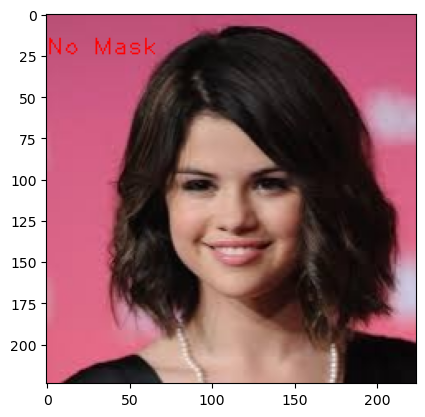

In [7]:
test_image = cv2.imread("MaskDataSet/test/without_mask/11.jpg")
Detect(test_image)

1/1 [==============================] - 0s 100ms/step
With Mask


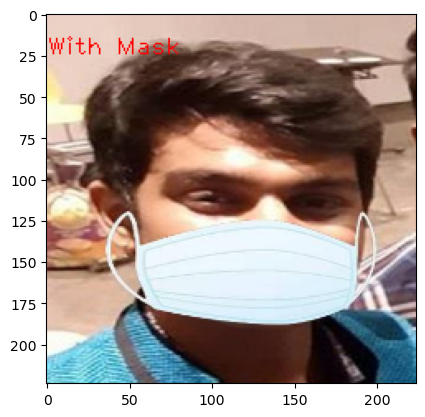

In [8]:
test_image = cv2.imread("MaskDataSet/train/with_mask/4-with-mask.jpg")
Detect(test_image)

In [ ]:
Vid = cv2.VideoCapture(0)
if not Vid.isOpened():
    cap = cv2.VideoCapture(0)
if not Vid.isOpened():
    raise IOError("WebCam Issue!!")
    
while True:
    ret , frame = cap.read()
    frame = cv2.flip(frame,1)
    final_image = cv2.resize(frame , (224,224))
    final_image = np.expand_dims(final_image , axis = 0)
    final_image = final_image/255.0
    predict = new_model.predict(final_image)
    font_size = 2
    font = cv2.FONT_HERSHEY_PLAIN
    if(predict[0]>0.5):
        cv2.putText(frame ,"No Mask", (0,25) , font,fontScale=font_size,color=(0,0,255))
    else:
        cv2.putText(frame ,"With Mask", (0,25) , font,fontScale=font_size,color=(0,0,255))
    cv2.imshow("Face Mask Detection",frame)
    if(cv2.waitKey(2) & 0xFF == ord('q')):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 142ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 141ms/step


1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 121ms/step
